## Imports

In [1]:
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## Data Ingestion

In [2]:
filepaths = []
for dirs in os.listdir('./data'):
    for file in os.listdir(f"./data/{dirs}"):
        file = f"./data/{dirs}/{file}"
        filepaths.append(file)

In [3]:
eventsDict = {}

In [6]:
for file in filepaths:
    if "primary" in file:
        category = "personal"
    if "cadsvskbdp4b4a5njoeh4lp314" in file:
        category = "project"
    if "0eumcrv5gkahhq8o98uej4ame8" in file:
        category = "wellness"
    f = open(file, 'r')
    f_json = json.loads(f.read())
    f_json_events = (f_json['items'])
    if f_json_events != []:
#         print(file)
        for event in f_json_events:
            eventsDict[event['id']] = [category, event['summary'], event['start'], event['end']]
    f.close()

In [7]:
len(eventsDict)

9715

## Data Cleaning

In [9]:
## ONLY RUN ONCE
# Some events have datetime while others have only date, this deals with that
for event in eventsDict:
    for i in range(2,4):
        eventDateTime = eventsDict[event][i]
        for key in eventDateTime:
            if 'dateTime' in eventDateTime.keys():
                eventsDict[event][i] = eventDateTime['dateTime']
            if 'date' in eventDateTime.keys():
                eventsDict[event][i] = eventDateTime['date']

In [10]:
df = pd.DataFrame.from_dict(eventsDict, orient='index')
df.rename({0: 'category', 1:'summary', 2:'start',3:'end'}, axis=1, inplace=True)

In [11]:
# Convert start and end to datetime objects and deal with timezones
df['start'] = pd.to_datetime(df['start'], utc=True)
df['start'] = df['start'].dt.tz_convert('US/Eastern')
df['end'] = pd.to_datetime(df['end'], utc=True)
df['end'] = df['end'].dt.tz_convert('US/Eastern')

# Create a new column for timedelta durations
df['duration'] = (df['end'] - df['start']).astype('timedelta64[m]')
# Create a new column for start day
df['date'] = df['start'].dt.date

# Sort by start time
df.sort_values('start', inplace=True)

## Analysis

**Questions we want to answer**

- How many unique events are there?
- What are their cumulative hours? 
- How many hours do my events cumilate to? 
- How much time am I spending on each category?
- How much sleep am I getting?
- Frequency of events

In [16]:
df.head()

,category,summary,start,end,duration,date
_891kcg9o6ssjab9m8l332b9k60qk8b9p84rj6b9h8or3ge9k8kq4cdpj6o,personal,Speaker at Sham uncle place,2017-06-02 05:30:00-04:00,2017-06-02 06:30:00-04:00,60.0,2017-06-02
_8go44dpp8p2j6ba16oqjgb9k6kp4ab9p8l0j8b9n8p1k6gpi8d2j4e9p6k,personal,Meet Navneet,2017-06-06 08:30:00-04:00,2017-06-06 09:30:00-04:00,60.0,2017-06-06
_70s32d9m6523ab9n650j8b9k64ok2ba26t234b9i8l1k8e9l70o42d1g74,personal,Fateh house,2017-06-09 08:30:00-04:00,2017-06-09 09:30:00-04:00,60.0,2017-06-09
_88o3gdpm8cs3eb9p88r44b9k8os4aba28cs42b9p651j8da16t0jagpo68,personal,Read #1,2017-06-23 10:00:00-04:00,2017-06-23 12:00:00-04:00,120.0,2017-06-23
_8kq3cea56gp36b9j60r3eb9k68pj6b9p65146ba16gqjcci471148c1g60,personal,International student check in,2017-06-23 13:00:00-04:00,2017-06-23 15:30:00-04:00,150.0,2017-06-23


In [17]:
print("Number of Unique Events", len(df['summary'].value_counts()))

Number of Unique Events 1230


In [18]:
top20 = df.groupby('summary')['duration'].sum().sort_values(ascending=False)[:20]
print("Top 20 most frequent events", top20//60)

Top 20 most frequent events summary
Sleep                       5972.0
Work: Walker Consultants    2587.0
Break                       1748.0
EDA Work                    1449.0
Lunch                        786.0
India                        544.0
Payday!                      504.0
Studio                       382.0
Video Game                   335.0
Dinner                       290.0
Hotel: Airbnb, Ann Arbor     288.0
Wake up                      238.0
Unaccounted                  206.0
Welax                        202.0
Relax                        199.0
Shower                       199.0
ARCH 302                     173.0
Portfolio                    164.0
Production Management        152.0
Night Routine                151.0
Name: duration, dtype: float64


## Sleep

In [19]:
# How much sleep have I been getting daily this year?
sleepdf = df[df['summary'] == ("Sleep")].sort_values('date')

In [28]:
sleepdf['duration_h'] = sleepdf['duration']//60
sleepdf['duration_h_avg']= sleepdf['duration_h'].rolling(30).mean()
sleepdf.dropna(inplace=True)

<AxesSubplot:xlabel='date'>

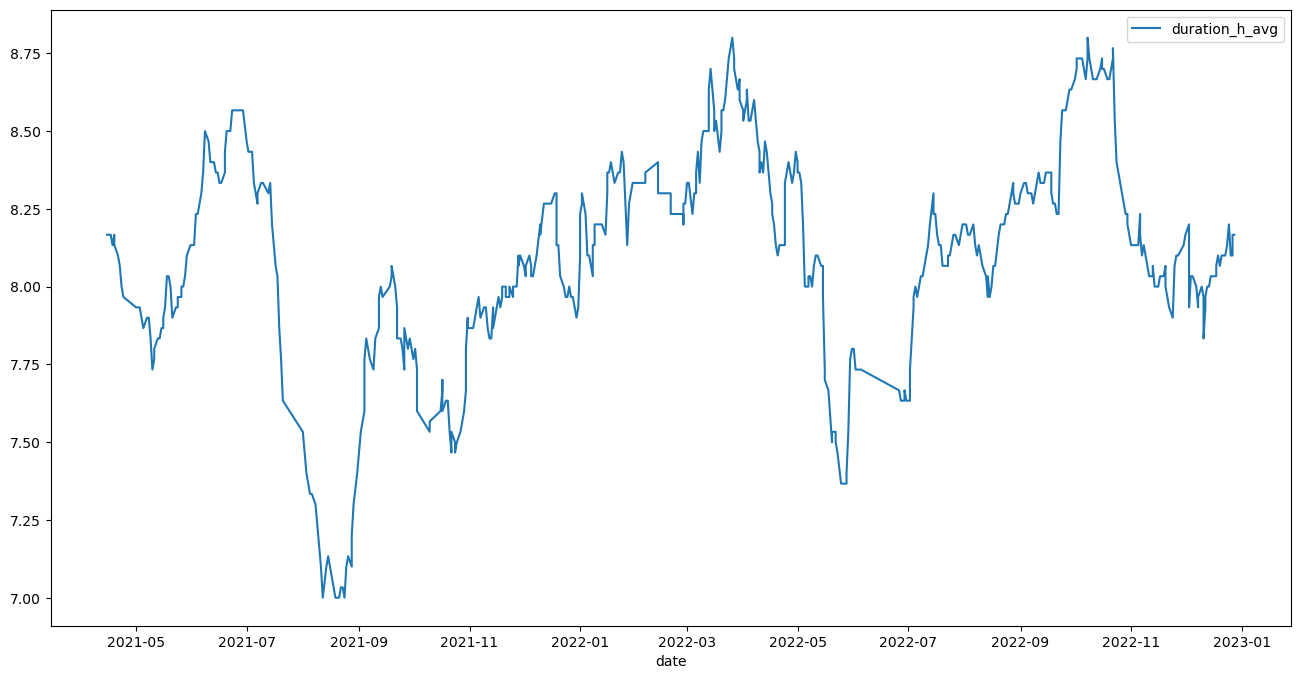

In [29]:
sleepdf.plot(x='date', y='duration_h_avg', kind='line', figsize=(16,8))

## Work

In [30]:
# How much work have I been getting done this year?
work_df = df[df['category']=='project'].sort_values('date')

In [33]:
top20 = work_df.groupby('summary')['duration'].sum().sort_values(ascending=False)//60
top20[:20]

summary
Work: Walker Consultants    2587.0
Portfolio                    154.0
ML: GANs                      57.0
Startup: Operations           54.0
Course: EECS598               44.0
Course: EECS598_HW            41.0
Startup: Marketing            39.0
UCSD: Unit 5                  30.0
Course: C++                   30.0
UCSD: Review                  25.0
Startup: Workflow             24.0
ML Tutorial                   23.0
Startup: Website              22.0
Grad Applications             19.0
Job Search                    18.0
UCSD: Prepwork                18.0
MSAIL Art                     17.0
Startup: Research             17.0
UCSD: Unit 11                 16.0
UCSD: Unit 12                 15.0
Name: duration, dtype: float64

In [34]:
sorted(pd.unique(work_df['summary']))

['AI Papers',
 'AI Podcast',
 'Architecture Book Reading',
 'Architecture Floor Plan Generation',
 'Artificial Intelligence: State of the Art - Lex Fridman',
 'BHCC Course Registration',
 'Blog Writing',
 'Bootcamp Assesment',
 'CS: Data Structures and Algorithms',
 'Calendar Management',
 'Call: Angel',
 'Call: Arnav Dasaur',
 'Call: Mike Mooney',
 'Call: Robert Aung',
 'Call: Rosa (SBA Mentor)',
 'Call: Sara',
 'Call: Scott',
 'Cleaning',
 'Clubhouse with Brendan',
 'Coding Practice',
 'Cofounder Matching',
 'Computational Portfolio',
 'Computer Setup',
 'Coures: Linear Algebra',
 'Course: C++',
 'Course: CSE599',
 'Course: Data Structures',
 'Course: Discrete Math',
 'Course: EECS589',
 'Course: EECS598',
 'Course: EECS598_HW',
 'Course: Graphics',
 'Course: Linear Algebra',
 'Course: Math for ML',
 'Course: Reinforcement Learning',
 'Course: UCSD Prep',
 'Course: Unreal Engine',
 'Course: Unreal Engine 5',
 'Coursera: Andrew Ng',
 'Coursera: Deep Learning',
 'Daily Journal Updates'

In [35]:
jobList = [
    'work', 'walker', 'job', 'portfolio',
    'interview', 'edge'
]
educationList = [
    'UCSD', 'ML', 'Tutorial', 'Math', 
    'EECS', 'UMICH', 'Course', 'Artificial', 
    'AI P', 'Architecture', 'CS', 'coding',
    'grad', 'appl', 'read', 'python',
    'msail', 'leet', 'algebra', 'gre',
    'boot', 'unreal', 'udemy', 'research',
    'NorthEastern Campus Tour',  'Studio conversation - Mon., May 3',
    'co.de.D Innovator Spotlight: Computational Design', 'Scott Project',
]
startupList = [
    'startup', 'fscore', 'business', 'call',
    'cofounder', 'freelanc', 'data', 'india',
    'savvy', 'e-com', 'project', 'Shopify',
     'Project: Wooden Artifacts', 'Pickup Cargo',     
]
organizingList = [
    'blog', 'cleaning', 'drawing', 'email',
    'finances', 'plan', 'future', 'life','organ',
    'meeting', 'setup', 'misc', 'chores',
    'draw', 'management', 'journal', 'goal', 'set up',
    'todo', 'to do', 'things to do', 'Clubhouse with Brendan',
     'Measuring', 'QnA with Lex Fridman',
]

work_df.loc[work_df['summary'].str.contains('|'.join(jobList), case=False),'project_name'] = 'Job'
work_df.loc[work_df['summary'].str.contains('|'.join(educationList), case=False),'project_name'] = 'Education'
work_df.loc[work_df['summary'].str.contains('|'.join(startupList), case=False),'project_name'] = 'Startup'
work_df.loc[work_df['summary'].str.contains('|'.join(organizingList), case=False),'project_name'] = 'Organizing'

sorted(pd.unique(work_df[work_df['project_name'] == '']['summary']))

[]

In [36]:
(work_df.groupby('project_name')['duration'].sum()//60).sort_values(ascending=False)

project_name
Job           2780.0
Education      658.0
Startup        330.0
Organizing     190.0
Name: duration, dtype: float64

In [39]:
date_range = pd.date_range(start='2020-11-01', end='2023-01-30', freq='D')
totalworkdf = work_df
jobdf = work_df[work_df['project_name']=='Job']
educationdf = work_df[work_df['project_name']=='Education']
startupdf = work_df[work_df['project_name']=='Startup']
organizingdf = work_df[work_df['project_name']=='Organizing']
def duration_rolling_avg(dframe):
    dframe = (dframe.groupby('date')['duration'].sum()).sort_index()
    dframe = dframe / 60
    dframe = dframe.reindex(date_range, fill_value=0)
    dframe= dframe.rolling(365).mean()
    dframe.dropna(inplace=True)
    
#     dframe = dframe[-180:]
    return dframe

totalworkdf = duration_rolling_avg(totalworkdf)
jobdf = duration_rolling_avg(jobdf)
educationdf = duration_rolling_avg(educationdf)
startupdf = duration_rolling_avg(startupdf)
organizingdf = duration_rolling_avg(organizingdf)

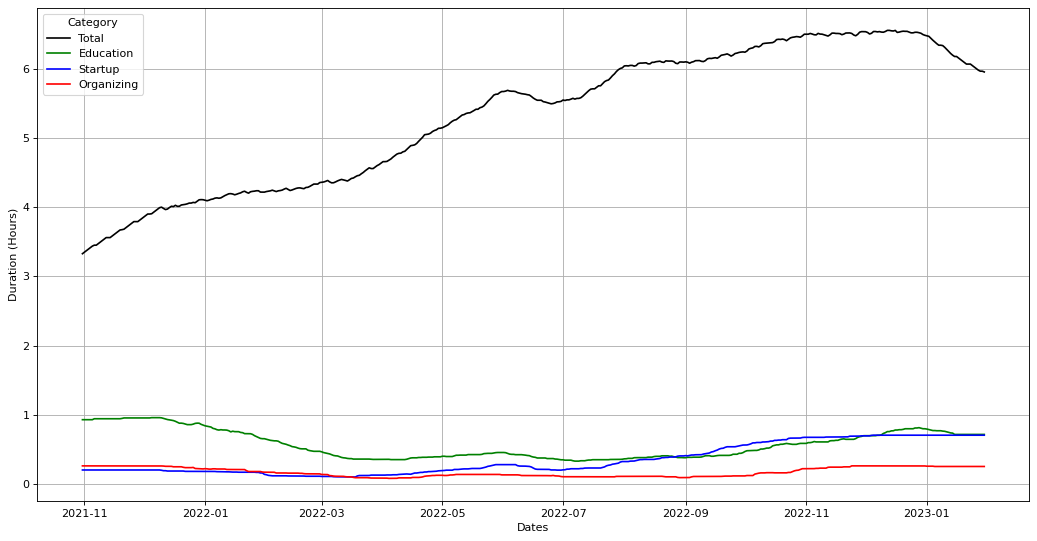

In [40]:
plt.figure(figsize=(16,8), dpi=80)
plt.grid(True, 'both')

plt.plot(totalworkdf, label='Total', color='black')
# plt.plot(jobdf, label='Work', color='red')
plt.plot(educationdf, label='Education', color='green')
plt.plot(startupdf, label='Startup', color='blue')
plt.plot(organizingdf, label='Organizing', color='red')

plt.legend(title='Category')
plt.ylabel('Duration (Hours)')
plt.xlabel('Dates')

plt.show()